# Section 5.2: Gradient descent dynamics in learning linear neural networks

This page contains simulations in Section 5.2.

## Contents

    - Training and test error rates as a function of the training time
    - Test performance with positive regularization
    - FUNCTIONS


## Training and test error rates as a function of the training time

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.special
pi = np.pi

In [ ]:
p = 256
n = 512
n_test = n
c = p/n

mu = np.concatenate([-np.ones(p//2),np.ones(p//2)])/np.sqrt(p)
norm_mu2 = np.linalg.norm(mu)**2
gamma = 0  # regularization penalty

t_max = 1000
alpha = 1e-2

sigma2_init = .1
w_init = np.sqrt(sigma2_init)*np.random.randn(p)/np.sqrt(p)


cs = [1/2,1/2]
lambda_s = c + 1 + norm_mu2 + c/norm_mu2

# Theory
tolerance = 1e-12

f  = lambda x,t : np.exp(-alpha*x*t)
omega = lambda x : np.sqrt(4*c*x - (1-c-x)**2)/(lambda_s-x)/2/pi
nu = lambda x : np.sqrt(4*c*x - (1-c-x)**2)/(2*pi*c*x)

E_test_func = lambda x,t : (1 - f(x+gamma,t))/(gamma+x)*omega(x)
E_test = lambda t : scipy.integrate.quadrature( lambda x : E_test_func(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,rtol=tolerance)[0] + np.max(norm_mu2**2-c,0)/norm_mu2*(1 - f(lambda_s+gamma,t))/(lambda_s+gamma)
V_test_func1 = lambda x,t : (1 - f(x+gamma,t))**2/((x+gamma)**2)*omega(x)
V_test_func2 = lambda x,t : (f(x+gamma,t))**2*nu(x)
V_test = lambda t : (norm_mu2+c)/norm_mu2*( scipy.integrate.quadrature( lambda x : V_test_func1(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,rtol=tolerance)[0] + np.max(norm_mu2**2-c,0)/norm_mu2*(1 - f(lambda_s+gamma,t))**2/((lambda_s+gamma)**2)) + sigma2_init*(scipy.integrate.quadrature( lambda x : V_test_func2(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,rtol=tolerance)[0] + np.max(1-1/c,0)*f(gamma,t)**2 )

E_train = lambda t : (norm_mu2+c)/norm_mu2*E_test(t)
V_train_func1 = lambda x,t : x*(1 - f(x+gamma,t))**2/((gamma+x)**2)*omega(x)
V_train_func2 = lambda x,t : x*(f(x+gamma,t))**2*nu(x)
V_train = lambda t : (norm_mu2+c)/norm_mu2*( scipy.integrate.quadrature( lambda x : V_train_func1(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,rtol=tolerance)[0] + np.max(norm_mu2**2-c,0)/norm_mu2*lambda_s*(1 - f(lambda_s+gamma,t))**2/((lambda_s+gamma)**2)) + sigma2_init*scipy.integrate.quadrature( lambda x : V_train_func2(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,rtol=tolerance)[0] - E_train(t)**2  #+ max(1-1/c,0)*0*f(gamma,t)**2

qfunc = lambda x : 0.5 - 0.5*scipy.special.erf(x/np.sqrt(2))

store_theory = np.zeros((t_max,2))
for t in range(t_max):
    store_theory[t,0] = qfunc(E_train(t)/np.sqrt(np.maximum(V_train(t),1e-20))) # train theory
    store_theory[t,1] = qfunc(E_test(t)/np.sqrt(np.maximum(V_test(t),1e-20))) # test theory


# Empirical
nb_data_loop = 1
store_perf = np.zeros((t_max,nb_data_loop,2))

for data_loop in range(nb_data_loop):

    y = np.concatenate([-np.ones(int(n*cs[0])),np.ones(int(n*cs[1]))])
    X = np.outer(mu,y) + np.random.randn(p,n)

    y_test = np.concatenate([-np.ones(int(n_test*cs[0])),np.ones(int(n_test*cs[1]))])
    X_test = np.outer(mu,y_test) + np.random.randn(p,n_test)

    w = w_init
    
    for t in range(t_max):
        store_perf[t,data_loop,0] = 1 - np.sum( np.sign(X.T@w)==y )/n # training error rate
        store_perf[t,data_loop,1] = 1 - np.sum( np.sign(X_test.T@w)==y_test )/n_test # test error rate
        w = gd(w, X, y, gamma, alpha, 1)

time=range(0,t_max,5)
plt.plot(time,np.mean(store_perf[time,:,0],1),'bx',label='Empirical training error')
plt.plot(time,np.mean(store_perf[time,:,1],1),'bo',label='Empirical test error')
plt.plot(time,store_theory[time,0],'r-',label='Asymptotic training error')
plt.plot(time,store_theory[time,1],'r--',label='Asymptotic test error')
_ = plt.legend()

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.519295e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.538407e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.445818e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.533442e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.495609e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.376388e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.349513e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.446607e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.380516e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 6.879824e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.500834e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.487910e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.752508e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.396784e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.923398e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.312473e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.274206e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 4.875412e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 6.235598e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.364621e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.181216e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.665432e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.194276e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 6.339460e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 7.393726e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.336462e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.353716e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.914471e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.147126e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 7.482144e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 8.462557e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.307066e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.491472e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.114612e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.110089e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 8.538330e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.592830e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.272065e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.613635e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.285624e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.074062e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.658657e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.054157e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.240231e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.697001e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.392792e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.044792e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.060251e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.161694e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.203143e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.772080e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.477104e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.012434e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.167595e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.244428e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.175084e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.818432e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.521065e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.884814e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.250371e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.402624e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.124714e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.888096e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.573725e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.458925e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.408903e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.485638e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.100348e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.917987e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.591728e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.253620e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.492153e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.605498e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 9.068213e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.571879e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.076510e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.945819e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.606553e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.668622e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.051417e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.974138e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.620217e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 8.841763e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.675690e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 8.679333e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.754839e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 1.030374e-06
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.997405e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.630720e-07
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integrate/_quadrature.py:245: AccuracyWarning: maxiter (50) exceeded. Latest difference = 8.664717e-08
  warnings.warn(
/usr/lib/python3.9/site-packages/scipy/integra

## Test performance with positive regularization

<ipython-input-164-e361c5b01116>:35: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  V_train = lambda t : (norm_mu2+c)/norm_mu2*( scipy.integrate.quad( lambda x : V_train_func1(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,epsabs=tolerance,epsrel=tolerance)[0] + np.max(norm_mu2**2-c,0)/norm_mu2*lambda_s*(1 - f(lambda_s+gamma,t))**2/((lambda_s+gamma)**2)) + sigma2_init*scipy.integrate.quad( lambda x : V_train_func2(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,epsabs=tolerance,epsrel=tolerance)[0] - E_train(t)**2  #+ max(1-1/c,0)*0*f(gamma,t)**2
<ipython-input-164-e361c5b01116>:30: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  V_test = lambda t : (norm_mu2+c)/norm_mu2*( scipy.integrate.quad( lambda x : V_test_func1(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,epsabs=tolerance,epsrel=tolerance)[0] + np.max(norm_mu2**2-c,0)/norm_mu2*(1 - f(lambda_s+gamma,t))**2/((lambda_s+

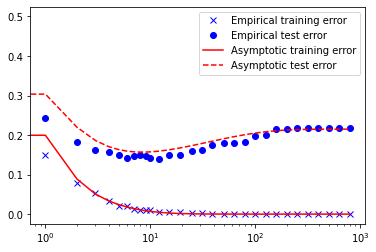

In [164]:
p = 512
n = 512
n_test = n
c = p/n

mu = np.concatenate([[np.sqrt(2)],np.zeros(p-1)])
norm_mu2 = np.linalg.norm(mu)**2
gamma = 0.1  # regularization penalty

t_max = 1000
alpha = 1e-1

sigma2_init = .1
w_init = np.sqrt(sigma2_init)*np.random.randn(p)/np.sqrt(p)

cs = [1/2,1/2]
lambda_s = c + 1 + norm_mu2 + c/norm_mu2

# Theory
tolerance = 1e-10

f  = lambda x,t : np.exp(-alpha*x*t)
omega = lambda x : np.sqrt(4*c*x - (1-c-x)**2)/(lambda_s-x)/2/pi
nu = lambda x : np.sqrt(4*c*x - (1-c-x)**2)/(2*pi*c*x)

E_test_func = lambda x,t : (1 - f(x+gamma,t))/(gamma+x)*omega(x)
E_test = lambda t : scipy.integrate.quad( lambda x : E_test_func(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,epsabs=tolerance,epsrel=tolerance)[0] + np.max(norm_mu2**2-c,0)/norm_mu2*(1 - f(lambda_s+gamma,t))/(lambda_s+gamma)
V_test_func1 = lambda x,t : (1 - f(x+gamma,t))**2/((x+gamma)**2)*omega(x)
V_test_func2 = lambda x,t : (f(x+gamma,t))**2*nu(x)
V_test = lambda t : (norm_mu2+c)/norm_mu2*( scipy.integrate.quad( lambda x : V_test_func1(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,epsabs=tolerance,epsrel=tolerance)[0] + np.max(norm_mu2**2-c,0)/norm_mu2*(1 - f(lambda_s+gamma,t))**2/((lambda_s+gamma)**2)) + sigma2_init*(scipy.integrate.quad( lambda x : V_test_func2(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,epsabs=tolerance,epsrel=tolerance)[0] + np.max(1-1/c,0)*f(gamma,t)**2 )

E_train = lambda t : (norm_mu2+c)/norm_mu2*E_test(t)
V_train_func1 = lambda x,t : x*(1 - f(x+gamma,t))**2/((gamma+x)**2)*omega(x)
V_train_func2 = lambda x,t : x*(f(x+gamma,t))**2*nu(x)
V_train = lambda t : (norm_mu2+c)/norm_mu2*( scipy.integrate.quad( lambda x : V_train_func1(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,epsabs=tolerance,epsrel=tolerance)[0] + np.max(norm_mu2**2-c,0)/norm_mu2*lambda_s*(1 - f(lambda_s+gamma,t))**2/((lambda_s+gamma)**2)) + sigma2_init*scipy.integrate.quad( lambda x : V_train_func2(x,t), (1-np.sqrt(c))**2+tolerance, (1+np.sqrt(c))**2-tolerance,epsabs=tolerance,epsrel=tolerance)[0] - E_train(t)**2  #+ max(1-1/c,0)*0*f(gamma,t)**2

qfunc = lambda x : 0.5 - 0.5*scipy.special.erf(x/np.sqrt(2))
store_theory = np.zeros((t_max,2))
for t in range(t_max):
    store_theory[t,0] = qfunc(E_train(t)/np.sqrt(np.maximum(V_train(t),1e-10))) # train theory
    store_theory[t,1] = qfunc(E_test(t)/np.sqrt(np.maximum(V_test(t),1e-10))) # test theory

# Empirical
nb_data_loop = 1
store_perf = np.zeros((t_max,nb_data_loop,2))

for data_loop in range(nb_data_loop):

    y = np.concatenate([-np.ones(int(n*cs[0])),np.ones(int(n*cs[1]))])
    X = np.outer(mu,y) + np.random.randn(p,n)

    y_test = np.concatenate([-np.ones(int(n_test*cs[0])),np.ones(int(n_test*cs[1]))])
    X_test = np.outer(mu,y_test) + np.random.randn(p,n_test)

    w = w_init

    for t in range(t_max):
        store_perf[t,data_loop,0] = 1 - np.sum( np.sign(X.T@w)==y )/n # training error rate
        store_perf[t,data_loop,1] = 1 - np.sum( np.sign(X_test.T@w)==y_test )/n_test # test error rate
        w = gd(w, X, y, gamma, alpha, 1)
        
time = np.concatenate([np.arange(10),[10**t for t in np.arange(1,3,.1)] ]).astype(int)
plt.semilogx(time,np.mean(store_perf[time,:,0],1),'bx',label='Empirical training error')
plt.semilogx(time,np.mean(store_perf[time,:,1],1),'bo',label='Empirical test error')
plt.semilogx(time,store_theory[time,0],'r-',label='Asymptotic training error')
plt.semilogx(time,store_theory[time,1],'r--',label='Asymptotic test error')    
_ = plt.legend()

## FUNCTIONS

In [135]:
def gd(w0, X, y, gamma, step, nb_step):
    p,n = np.shape(X)
    w_tmp = w0

    while nb_step > 0:
        g = (X@X.T/n + gamma*np.eye(p))@w_tmp - X@y/n

        # take gradient step
        w_new = w_tmp - step*g
    
        nb_step -= 1
        w_tmp = w_new
        
    return w_new